# LDA

In [131]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [133]:
iris = load_iris()

In [134]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [135]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [136]:
d = data[['sepal length (cm)', 'sepal width (cm)']]

In [137]:
d

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [138]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(d, data_class, test_size=0.30)
lda = LinearDiscriminantAnalysis()

# обучаем на выделенных данных
lda.fit(X_train, y_train)
X_predict = lda.predict(X_test)
# y_predict = lda.predict(y_test)

In [140]:
accuracy_score(y_test, X_predict)

0.8222222222222222

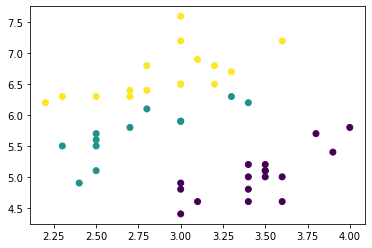

In [141]:
plt.scatter(X_test['sepal width (cm)'], X_test['sepal length (cm)'], c=X_predict)

In [142]:
centers = lda.means_

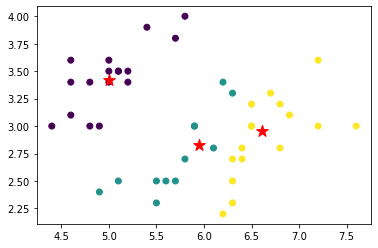

In [143]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=X_predict)
plt.scatter(centers[:,0], centers[:,1], c='r', s=150, marker='*')

In [144]:
centers

array([[5.0030303 , 3.41818182],
       [5.95263158, 2.82631579],
       [6.61470588, 2.95588235]])

In [145]:
X_predict

array([0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0,
       2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0,
       0])

# K-Means

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [147]:
scaler = StandardScaler()

In [148]:
claster = data[['sepal length (cm)', 'sepal width (cm)']]

In [149]:
d_scaled = scaler.fit_transform(claster)

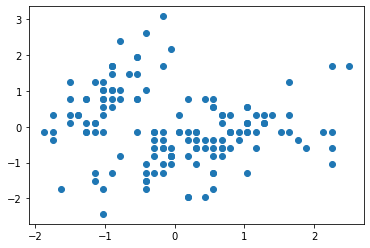

In [150]:
plt.scatter(d_scaled[:,0], d_scaled[:,1])

In [151]:
kmeans = KMeans(n_clusters=3)

In [152]:
clusters = kmeans.fit_predict(d_scaled)

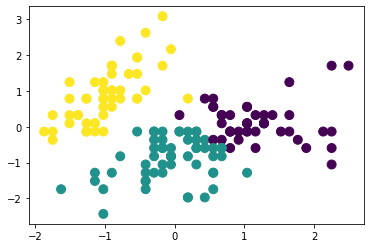

In [153]:
plt.scatter(d_scaled[:, 0], d_scaled[:, 1], cmap='viridis', c=clusters, s=80)

In [154]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(d_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

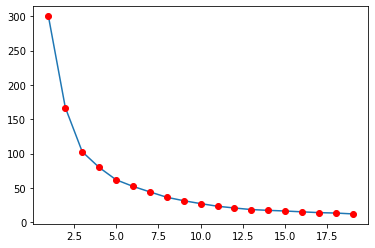

In [155]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')